# 랭체인(LangChain) Document transformers 예제
## 작성자 : AISchool ( http://aischool.ai/%ec%98%a8%eb%9d%bc%ec%9d%b8-%ea%b0%95%ec%9d%98-%ec%b9%b4%ed%85%8c%ea%b3%a0%eb%a6%ac/ )
## Reference : https://python.langchain.com/docs/modules/data_connection/document_transformers/

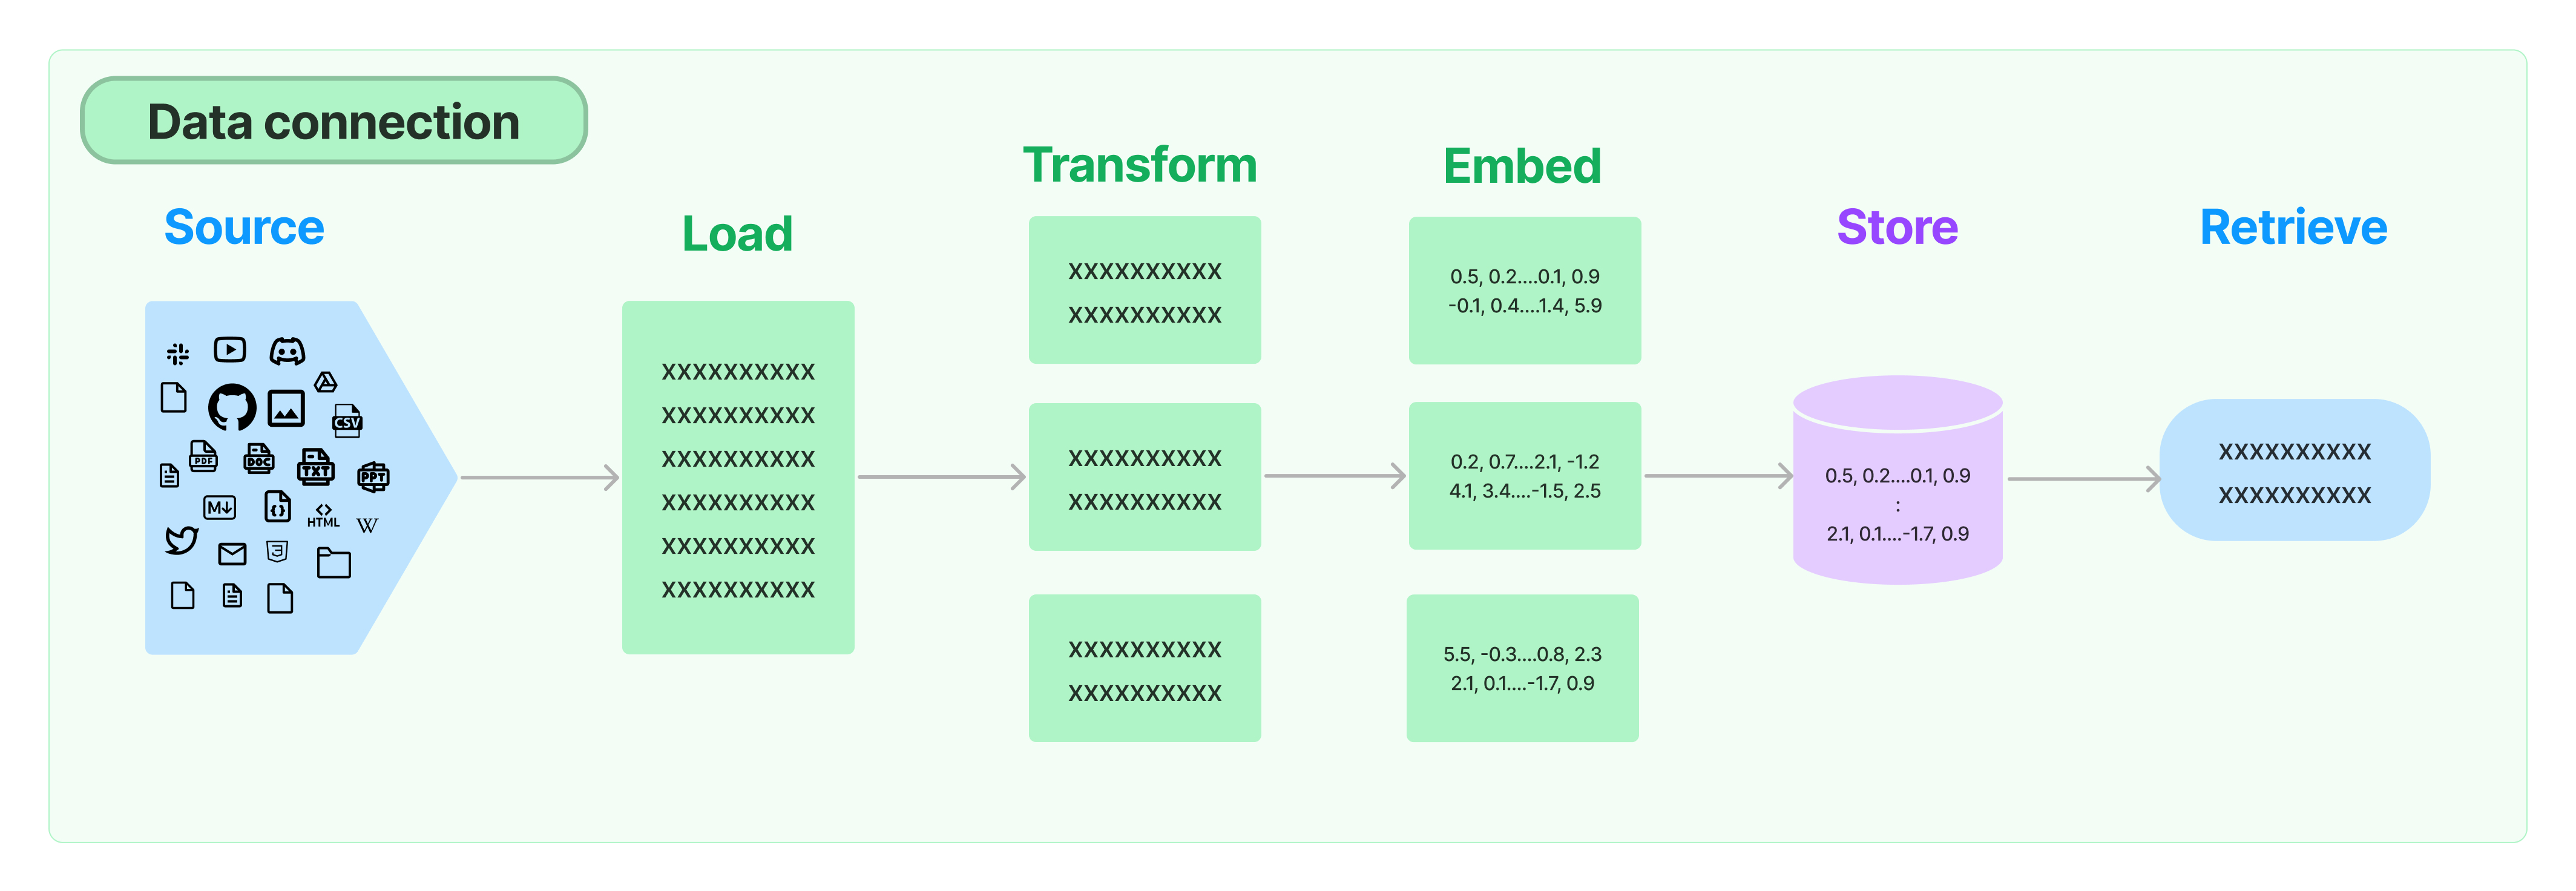

# LangChain 라이브러리 설치

In [ ]:
!pip install langchain

# Text Splitter 기초예제

In [ ]:
# 예제 txt 파일 다운로드 받기
!wget https://gist.githubusercontent.com/solaris33/ba8737e11f886b188de319884cffae47/raw/58f9861e7eefe9de75bd62be04f7b6082ec568d2/llm_example_text.txt -O llm_example_text.txt

--2023-11-08 14:19:22--  https://gist.githubusercontent.com/solaris33/ba8737e11f886b188de319884cffae47/raw/58f9861e7eefe9de75bd62be04f7b6082ec568d2/llm_example_text.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2799 (2.7K) [text/plain]
Saving to: ‘llm_example_text.txt’

llm_example_text.tx 100%[===================>]   2.73K  --.-KB/s    in 0s      

2023-11-08 14:19:22 (46.8 MB/s) - ‘llm_example_text.txt’ saved [2799/2799]



In [ ]:
# 예제 텍스트 읽어오기
with open('./llm_example_text.txt') as f:
    llm_example_text = f.read()

In [ ]:
llm_example_text

'대형 언어 모델(Large language model, LLM) 또는 거대 언어 모델은 수많은 파라미터(보통 수십억 웨이트 이상)를 보유한 인공 신경망으로 구성되는 언어 모델이다. 자기 지도 학습이나 반자기지도학습을 사용하여 레이블링되지 않은 상당한 양의 텍스트로 훈련된다.[1] LLM은 2018년 즈음에 모습을 드러냈으며 다양한 작업을 위해 수행된다. 이전의 특정 작업의 특수한 지도 학습 모델의 훈련 패러다임에서 벗어나 자연어 처리 연구로 초점이 옮겨졌다.\n\n대규모 언어 모델(LLM) 은 AI 챗봇 기술을 가능하게 하는 요소이며 많은 화제를 불러일으키고 있는 주제 중 하나다. 대규모 언어 모델(LLM)의 작동 방식은 크게 3가지로 나뉘고 있다. 토큰화, 트랜스포머 모델, 프롬프트 등. 토큰화는 자연어 처리의 일부로 일반 인간 언어를 저수준 기계 시스템(LLMS)가 이해할 수 있는 시퀀스로 변환하는 작업을 말하며 여기에는 섹션에 숫자 값을 할당하고 빠른 분석을 위해 인코딩하는 작업이 수반된다. 이는 음성학의 AI 버전과 같으며 토큰화의 목적은 인공지능이 문장의 구조를 예측하기 위한 학습 가이드 또는 공식과 같은 컨텍스트 백터를 생성하는 것이 목적. 언어를 더 많이 연구하고 문장이 어떻게 구성되는지 이해할수록 특정 유형의 문장에서 다음 언어에 대한 예측이 더 정확 해진다. 이로 인해 온라인에서 사람들이 사용하는 다양한 커뮤니케이션 스타일을 재현하는 모델을 개발할 수 있다.\n\n트랜스포머 모델은 순차적 데이터를 검사하여 어떤 단어가 서로 뒤따를 가능성이 높은지 관련 패턴을 식별하는 신경망의 일종으로 각각 다른 분석을 수행하여 어떤 단어가 호환되는지 결정하는 계층으로 구성된다. 이러한 모델은 언어를 학습하지 않고 알고리즘에 의존하여 사람이 쓴 단어를 이해하고 예를들어, 힙스터 커피 블로그를 제공함으로써 커피에 대한 표준 글을 작성하도록 학습 시킨다. 이 트랜스포머 모델이 대규모 언어 모델 LLM 언어 생성의 기초.\n\n프롬프트는 개발자가 정보를 분석하고 토

## RecursiveCharacterTextSplitter

기본으로 추천하는 Text splitter는 **RecursiveCharacterTextSplitter**입니다.

기본적으로 사용하는 구분 기호는 **["\n\n", "\n", " ", ""]**입니다.

1. **length_function** : chunk의 길이를 계산하는 방법을 지정합니다. 기본값으로는 문자의 길이로 지정하지만 토큰의 개수로 지정하는 경우도 흔합니다.
2. **chunk_size** : (length_function에서 정의한 기준에 따른) chunk의 최대 크기
3. **chunk_overlap** : chunk 간에 최대 중복 크기, 자연스러운 연결을 위해서 적절한 길이의 중복이 있는 것이 좋습니다.
4. **add_start_index** : 원본 문서내에서 chunk의 시작위치를 metadata에 포함할지 말지를 결정

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap  = 20,
    length_function = len,
    add_start_index = True,
)

In [ ]:
llm_example_text

'대형 언어 모델(Large language model, LLM) 또는 거대 언어 모델은 수많은 파라미터(보통 수십억 웨이트 이상)를 보유한 인공 신경망으로 구성되는 언어 모델이다. 자기 지도 학습이나 반자기지도학습을 사용하여 레이블링되지 않은 상당한 양의 텍스트로 훈련된다.[1] LLM은 2018년 즈음에 모습을 드러냈으며 다양한 작업을 위해 수행된다. 이전의 특정 작업의 특수한 지도 학습 모델의 훈련 패러다임에서 벗어나 자연어 처리 연구로 초점이 옮겨졌다.\n\n대규모 언어 모델(LLM) 은 AI 챗봇 기술을 가능하게 하는 요소이며 많은 화제를 불러일으키고 있는 주제 중 하나다. 대규모 언어 모델(LLM)의 작동 방식은 크게 3가지로 나뉘고 있다. 토큰화, 트랜스포머 모델, 프롬프트 등. 토큰화는 자연어 처리의 일부로 일반 인간 언어를 저수준 기계 시스템(LLMS)가 이해할 수 있는 시퀀스로 변환하는 작업을 말하며 여기에는 섹션에 숫자 값을 할당하고 빠른 분석을 위해 인코딩하는 작업이 수반된다. 이는 음성학의 AI 버전과 같으며 토큰화의 목적은 인공지능이 문장의 구조를 예측하기 위한 학습 가이드 또는 공식과 같은 컨텍스트 백터를 생성하는 것이 목적. 언어를 더 많이 연구하고 문장이 어떻게 구성되는지 이해할수록 특정 유형의 문장에서 다음 언어에 대한 예측이 더 정확 해진다. 이로 인해 온라인에서 사람들이 사용하는 다양한 커뮤니케이션 스타일을 재현하는 모델을 개발할 수 있다.\n\n트랜스포머 모델은 순차적 데이터를 검사하여 어떤 단어가 서로 뒤따를 가능성이 높은지 관련 패턴을 식별하는 신경망의 일종으로 각각 다른 분석을 수행하여 어떤 단어가 호환되는지 결정하는 계층으로 구성된다. 이러한 모델은 언어를 학습하지 않고 알고리즘에 의존하여 사람이 쓴 단어를 이해하고 예를들어, 힙스터 커피 블로그를 제공함으로써 커피에 대한 표준 글을 작성하도록 학습 시킨다. 이 트랜스포머 모델이 대규모 언어 모델 LLM 언어 생성의 기초.\n\n프롬프트는 개발자가 정보를 분석하고 토

In [ ]:
texts = text_splitter.create_documents([llm_example_text])
print(texts[0])

page_content='대형 언어 모델(Large language model, LLM) 또는 거대 언어 모델은 수많은 파라미터(보통 수십억 웨이트 이상)를 보유한 인공 신경망으로 구성되는 언어 모델이다.' metadata={'start_index': 0}


In [ ]:
print(texts[1])

page_content='신경망으로 구성되는 언어 모델이다. 자기 지도 학습이나 반자기지도학습을 사용하여 레이블링되지 않은 상당한 양의 텍스트로 훈련된다.[1] LLM은 2018년 즈음에 모습을' metadata={'start_index': 81}


In [ ]:
print(texts[15])

page_content='따라서 딥러닝 AI의 적절한 학습을 위해서는 적절한 프롬프트를 선택하는 것이 중요하다.' metadata={'start_index': 1131}


In [ ]:
len(texts)

16

# HTMLHeaderTextSplitter

In [ ]:
from langchain.text_splitter import HTMLHeaderTextSplitter

html_string = """
<!DOCTYPE html>
<html>
<body>
    <div>
        <h1>Foo</h1>
        <p>Some intro text about Foo.</p>
        <div>
            <h2>Bar main section</h2>
            <p>Some intro text about Bar.</p>
            <h3>Bar subsection 1</h3>
            <p>Some text about the first subtopic of Bar.</p>
            <h3>Bar subsection 2</h3>
            <p>Some text about the second subtopic of Bar.</p>
        </div>
        <div>
            <h2>Baz</h2>
            <p>Some text about Baz</p>
        </div>
        <br>
        <p>Some concluding text about Foo</p>
    </div>
</body>
</html>
"""

headers_to_split_on = [
    ("h1", "Header 1"),
    ("h2", "Header 2"),
    ("h3", "Header 3"),
]

html_splitter = HTMLHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
html_header_splits = html_splitter.split_text(html_string)
html_header_splits

[Document(page_content='Foo'),
 Document(page_content='Some intro text about Foo.  \nBar main section Bar subsection 1 Bar subsection 2', metadata={'Header 1': 'Foo'}),
 Document(page_content='Some intro text about Bar.', metadata={'Header 1': 'Foo', 'Header 2': 'Bar main section'}),
 Document(page_content='Some text about the first subtopic of Bar.', metadata={'Header 1': 'Foo', 'Header 2': 'Bar main section', 'Header 3': 'Bar subsection 1'}),
 Document(page_content='Some text about the second subtopic of Bar.', metadata={'Header 1': 'Foo', 'Header 2': 'Bar main section', 'Header 3': 'Bar subsection 2'}),
 Document(page_content='Baz', metadata={'Header 1': 'Foo'}),
 Document(page_content='Some text about Baz', metadata={'Header 1': 'Foo', 'Header 2': 'Baz'}),
 Document(page_content='Some concluding text about Foo', metadata={'Header 1': 'Foo'})]

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

url = "https://ko.wikipedia.org/wiki/%EB%8C%80%ED%98%95_%EC%96%B8%EC%96%B4_%EB%AA%A8%EB%8D%B8"

headers_to_split_on = [
    ("h1", "Header 1"),
    ("h2", "Header 2"),
    ("h3", "Header 3"),
    ("h4", "Header 4"),
]

html_splitter = HTMLHeaderTextSplitter(headers_to_split_on=headers_to_split_on)

html_header_splits = html_splitter.split_text_from_url(url)
html_header_splits

[Document(page_content='주 메뉴  \n사이드바로 이동 숨기기  \n주 메뉴  \n둘러보기  \n대문최근 바뀜요즘 화제임의의 문서로기부  \n사용자 모임  \n사랑방사용자 모임관리 요청  \n편집 안내  \n도움말정책과 지침질문방  \n언어  \n이 위키백과에서 언어 링크는 문서 제목 건너편의 문서 최상단에 있습니다. 최상단으로 이동합니다.  \n검색  \n검색  \n계정 만들기로그인  \n개인 도구  \n계정 만들기 로그인  \n로그아웃한 편집자를 위한 문서 더 알아보기  \n기여토론  \n목차 사이드바로 이동 숨기기  \n처음 위치  \n1대형 언어 모델 목록  \n2각주  \n대형 언어 모델'),
 Document(page_content="목차 토글  \n22개 언어  \nBoarischBosanskiCatalàČeštinaΕλληνικάEnglishEspañolفارسیFrançaisGalegoעבריתहिन्दी日本語PortuguêsRuna SimiРусскийSlovenščinaTürkçeУкраїнська中文Bân-lâm-gúIsiZulu  \n링크 편집  \n문서토론  \n한국어  \n읽기편집역사 보기  \n도구  \n사이드바로 이동 숨기기  \n도구  \n동작  \n읽기편집역사 보기  \n일반  \n여기를 가리키는 문서가리키는 글의 최근 바뀜파일 올리기특수 문서 목록고유 링크문서 정보이 문서 인용하기축약된 URL 얻기위키데이터 항목  \n인쇄/내보내기  \n책 만들기PDF로 다운로드인쇄용 판  \n위키백과, 우리 모두의 백과사전.  \n대형 언어 모델 목록[편집] 대형 언어 모델 목록 이름 출시일[a] 개발 파라미터 수[b] 코퍼스 크기 라이선스[c] BERT 2018년 구글 340 million[2] 3.3 billion words[2] Apache 2.0[3] XLNet 2019년 Google ~340 million[4] 33 billion words GPT-2 2019년 OpenAI 1.5 billion[5] 40GB[6

In [ ]:
chunk_size = 500
chunk_overlap = 30
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size, chunk_overlap=chunk_overlap
)

# Split
splits = text_splitter.split_documents(html_header_splits)
splits[8:11]

[Document(page_content='대형 언어 모델(Large language model, LLM) 또는 거대 언어 모델은 수많은 파라미터(보통 수십억 웨이트 이상)를 보유한 인공 신경망으로 구성되는 언어 모델이다. 자기 지도 학습이나 반자기지도학습을 사용하여 레이블링되지 않은 상당한 양의 텍스트로 훈련된다.[1] LLM은 2018년 즈음에 모습을 드러냈으며 다양한 작업을 위해 수행된다. 이전의 특정 작업의 특수한 지도 학습 모델의 훈련 패러다임에서 벗어나 자연어 처리 연구로 초점이 옮겨졌다.', metadata={'Header 1': '대형 언어 모델'}),
 Document(page_content='대규모 언어 모델(LLM) 은 AI 챗봇 기술을 가능하게 하는 요소이며 많은 화제를 불러일으키고 있는 주제 중 하나다. 대규모 언어 모델(LLM)의 작동 방식은 크게 3가지로 나뉘고 있다. 토큰화, 트랜스포머 모델, 프롬프트 등. 토큰화는 자연어 처리의 일부로 일반 인간 언어를 저수준 기계 시스템(LLMS)가 이해할 수 있는 시퀀스로 변환하는 작업을 말하며 여기에는 섹션에 숫자 값을 할당하고 빠른 분석을 위해 인코딩하는 작업이 수반된다. 이는 음성학의 AI 버전과 같으며 토큰화의 목적은 인공지능이 문장의 구조를 예측하기 위한 학습 가이드 또는 공식과 같은 컨텍스트 백터를 생성하는 것이 목적. 언어를 더 많이 연구하고 문장이 어떻게 구성되는지 이해할수록 특정 유형의 문장에서 다음 언어에 대한 예측이 더 정확 해진다. 이로 인해 온라인에서 사람들이 사용하는 다양한 커뮤니케이션 스타일을 재현하는 모델을 개발할 수 있다.', metadata={'Header 1': '대형 언어 모델'}),
 Document(page_content='트랜스포머 모델은 순차적 데이터를 검사하여 어떤 단어가 서로 뒤따를 가능성이 높은지 관련 패턴을 식별하는 신경망의 일종으로 각각 다른 분석을 수행하여 어떤 단어가 호환되는지 결정하는 계층으로 구성된다. 이러한 모델은 언어를 학습하지 않

# CodeTextSplitter

In [ ]:
from langchain.text_splitter import (
    RecursiveCharacterTextSplitter,
    Language,
)

In [ ]:
[e.value for e in Language]

['cpp',
 'go',
 'java',
 'kotlin',
 'js',
 'ts',
 'php',
 'proto',
 'python',
 'rst',
 'ruby',
 'rust',
 'scala',
 'swift',
 'markdown',
 'latex',
 'html',
 'sol',
 'csharp',
 'cobol']

In [ ]:
RecursiveCharacterTextSplitter.get_separators_for_language(Language.PYTHON)

['\nclass ', '\ndef ', '\n\tdef ', '\n\n', '\n', ' ', '']

In [ ]:
PYTHON_CODE = """
def hello_world():
    print("Hello, World!")

# Call the function
hello_world()
"""
python_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.PYTHON, chunk_size=50, chunk_overlap=0
)
python_docs = python_splitter.create_documents([PYTHON_CODE])
python_docs

[Document(page_content='def hello_world():\n    print("Hello, World!")'),
 Document(page_content='# Call the function\nhello_world()')]

In [ ]:
JS_CODE = """
function helloWorld() {
  console.log("Hello, World!");
}

// Call the function
helloWorld();
"""

js_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.JS, chunk_size=60, chunk_overlap=0
)
js_docs = js_splitter.create_documents([JS_CODE])
js_docs


[Document(page_content='function helloWorld() {\n  console.log("Hello, World!");\n}'),
 Document(page_content='// Call the function\nhelloWorld();')]

# MarkdownHeaderTextSplitter

In [ ]:
from langchain.text_splitter import MarkdownHeaderTextSplitter

In [ ]:
markdown_document = "# Foo\n\n    ## Bar\n\nHi this is Jim\n\nHi this is Joe\n\n ### Boo \n\n Hi this is Lance \n\n ## Baz\n\n Hi this is Molly"

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits

[Document(page_content='Hi this is Jim  \nHi this is Joe', metadata={'Header 1': 'Foo', 'Header 2': 'Bar'}),
 Document(page_content='Hi this is Lance', metadata={'Header 1': 'Foo', 'Header 2': 'Bar', 'Header 3': 'Boo'}),
 Document(page_content='Hi this is Molly', metadata={'Header 1': 'Foo', 'Header 2': 'Baz'})]

In [ ]:
md_header_splits[0]

Document(page_content='Hi this is Jim  \nHi this is Joe', metadata={'Header 1': 'Foo', 'Header 2': 'Bar'})

In [ ]:
markdown_document = "# Intro \n\n    ## History \n\n Markdown[9] is a lightweight markup language for creating formatted text using a plain-text editor. John Gruber created Markdown in 2004 as a markup language that is appealing to human readers in its source code form.[9] \n\n Markdown is widely used in blogging, instant messaging, online forums, collaborative software, documentation pages, and readme files. \n\n ## Rise and divergence \n\n As Markdown popularity grew rapidly, many Markdown implementations appeared, driven mostly by the need for \n\n additional features such as tables, footnotes, definition lists,[note 1] and Markdown inside HTML blocks. \n\n #### Standardization \n\n From 2012, a group of people, including Jeff Atwood and John MacFarlane, launched what Atwood characterised as a standardisation effort. \n\n ## Implementations \n\n Implementations of Markdown are available for over a dozen programming languages."

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
]

# MD splits
markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits

[Document(page_content='Markdown[9] is a lightweight markup language for creating formatted text using a plain-text editor. John Gruber created Markdown in 2004 as a markup language that is appealing to human readers in its source code form.[9]  \nMarkdown is widely used in blogging, instant messaging, online forums, collaborative software, documentation pages, and readme files.', metadata={'Header 1': 'Intro', 'Header 2': 'History'}),
 Document(page_content='As Markdown popularity grew rapidly, many Markdown implementations appeared, driven mostly by the need for  \nadditional features such as tables, footnotes, definition lists,[note 1] and Markdown inside HTML blocks.  \n#### Standardization  \nFrom 2012, a group of people, including Jeff Atwood and John MacFarlane, launched what Atwood characterised as a standardisation effort.', metadata={'Header 1': 'Intro', 'Header 2': 'Rise and divergence'}),
 Document(page_content='Implementations of Markdown are available for over a dozen pro

In [ ]:
# Char-level splits
from langchain.text_splitter import RecursiveCharacterTextSplitter

chunk_size = 250
chunk_overlap = 30
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size, chunk_overlap=chunk_overlap
)

# Split
splits = text_splitter.split_documents(md_header_splits)
splits

[Document(page_content='Markdown[9] is a lightweight markup language for creating formatted text using a plain-text editor. John Gruber created Markdown in 2004 as a markup language that is appealing to human readers in its source code form.[9]', metadata={'Header 1': 'Intro', 'Header 2': 'History'}),
 Document(page_content='Markdown is widely used in blogging, instant messaging, online forums, collaborative software, documentation pages, and readme files.', metadata={'Header 1': 'Intro', 'Header 2': 'History'}),
 Document(page_content='As Markdown popularity grew rapidly, many Markdown implementations appeared, driven mostly by the need for  \nadditional features such as tables, footnotes, definition lists,[note 1] and Markdown inside HTML blocks.  \n#### Standardization', metadata={'Header 1': 'Intro', 'Header 2': 'Rise and divergence'}),
 Document(page_content='#### Standardization  \nFrom 2012, a group of people, including Jeff Atwood and John MacFarlane, launched what Atwood chara

# Split by tokens

tiktoken은 OpenAI에서 개발된 BPE 알고리즘을 사용하는 tokenizer입니다.

In [ ]:
!pip install tiktoken

In [ ]:
# 텍스트 읽어오기
with open('./llm_example_text.txt') as f:
    llm_example_text = f.read()

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=100, chunk_overlap=0
)
texts = text_splitter.split_text(llm_example_text)

In [ ]:
print(texts[0])

대형 언어 모델(Large language model, LLM) 또는 거대 언어 모델은 수많은 파라미터(보통 수십억 웨이트


In [ ]:
print(texts[1])

이상)를 보유한 인공 신경망으로 구성되는 언어 모델이다. 자기 지도 학습이나


# 1. WebBaseLoader
**WebBaseLoader**는 URL로부터 HTML 페이지의 모든 text를 load합니다.

In [ ]:
from langchain.document_loaders import WebBaseLoader

In [ ]:
loader = WebBaseLoader("https://www.espn.com/")

In [ ]:
data = loader.load()

In [ ]:
data

[Document(page_content="\n\n\n\n\n\n\n\n\nESPN - Serving Sports Fans. Anytime. Anywhere.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        Skip to main content\n    \n\n        Skip to navigation\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<\n\n>\n\n\n\n\n\n\n\n\n\nMenuESPN\n\n\n\n\n\nscores\n\n\n\nNFLMLBNCAAFNBANHLSoccer…NCAAMNCAAWSports BettingBoxingCFLNCAACricketF1GolfHorseLLWSMMANASCARNBA G LeagueOlympic SportsPLLRacingRN BBRN FBRugbyTennisWNBAWWEX GamesXFLMore ESPNFantasyListenWatchESPN+\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n\nSubscribe Now\n\n\n\n\n\nFormula 1: Brazilian Grand Prix\n\n\n\n\n\n\n\nNHL\n\n\n\n\n\n\n\nUFC 295: Prochazka vs. Pereira (Nov. 11, ESPN+ PPV)\n\n\nQuick Links\n\n\n\n\nNBA In-Season Tournament\n\n\n\n\n\n\n\nCollege Football Schedule\n\n\n\n\n\n\n\nNFL Schedule\n\n\n\n\n\n\n\nFantasy Footbal

In [ ]:
loader = WebBaseLoader("https://ko.wikipedia.org/wiki/%EB%8C%80%ED%98%95_%EC%96%B8%EC%96%B4_%EB%AA%A8%EB%8D%B8")

In [ ]:
data = loader.load()

In [ ]:
data

[Document(page_content='\n\n\n\n대형 언어 모델 - 위키백과, 우리 모두의 백과사전\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n본문으로 이동\n\n\n\n\n\n\n\n주 메뉴\n\n\n\n\n\n주 메뉴\n사이드바로 이동\n숨기기\n\n\n\n\t\t둘러보기\n\t\n\n\n대문최근 바뀜요즘 화제임의의 문서로기부\n\n\n\n\n\n\t\t사용자 모임\n\t\n\n\n사랑방사용자 모임관리 요청\n\n\n\n\n\n\t\t편집 안내\n\t\n\n\n도움말정책과 지침질문방\n\n\n\n\n\n언어\n\n이 위키백과에서 언어 링크는 문서 제목 건너편의 문서 최상단에 있습니다. 최상단으로 이동합니다.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n검색\n\n\n\n\n\n\n\n\n\n\n\n검색\n\n\n\n\n\n\n\n\n계정 만들기로그인\n\n\n\n\n\n\n개인 도구\n\n\n\n\n\n 계정 만들기 로그인\n\n\n\n\n\n\t\t로그아웃한 편집자를 위한 문서 더 알아보기\n\n\n\n기여토론\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n목차\n사이드바로 이동\n숨기기\n\n\n\n\n처음 위치\n\n\n\n\n\n1대형 언어 모델 목록\n\n\n\n\n\n\n\n2각주\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n목차 토글\n\n\n\n\n\n\n\n대형 언어 모델\n\n\n\n22개 언어\n\n\n\n\nBoarischBosanskiCatalàČeštinaΕλληνικάEnglishEspañolفارسیFrançaisGalegoעבריתहिन्दी日本語PortuguêsRuna SimiРусскийSlovenščinaTürkçeУкраїнська中文Bân-lâm-gúIsiZulu\n\n링크 편집\n\n\n\n\n\n\n\n\n\n\n\n문서토론\n\n\n\n\n\n한국어\n\n\n\n\n

In [ ]:
# 여러 URL을 같이 load하기
loader = WebBaseLoader(["https://ko.wikipedia.org/wiki/%EB%8C%80%ED%98%95_%EC%96%B8%EC%96%B4_%EB%AA%A8%EB%8D%B8", "https://google.com"])
docs = loader.load()
docs

[Document(page_content='\n\n\n\n대형 언어 모델 - 위키백과, 우리 모두의 백과사전\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n본문으로 이동\n\n\n\n\n\n\n\n주 메뉴\n\n\n\n\n\n주 메뉴\n사이드바로 이동\n숨기기\n\n\n\n\t\t둘러보기\n\t\n\n\n대문최근 바뀜요즘 화제임의의 문서로기부\n\n\n\n\n\n\t\t사용자 모임\n\t\n\n\n사랑방사용자 모임관리 요청\n\n\n\n\n\n\t\t편집 안내\n\t\n\n\n도움말정책과 지침질문방\n\n\n\n\n\n언어\n\n이 위키백과에서 언어 링크는 문서 제목 건너편의 문서 최상단에 있습니다. 최상단으로 이동합니다.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n검색\n\n\n\n\n\n\n\n\n\n\n\n검색\n\n\n\n\n\n\n\n\n계정 만들기로그인\n\n\n\n\n\n\n개인 도구\n\n\n\n\n\n 계정 만들기 로그인\n\n\n\n\n\n\t\t로그아웃한 편집자를 위한 문서 더 알아보기\n\n\n\n기여토론\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n목차\n사이드바로 이동\n숨기기\n\n\n\n\n처음 위치\n\n\n\n\n\n1대형 언어 모델 목록\n\n\n\n\n\n\n\n2각주\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n목차 토글\n\n\n\n\n\n\n\n대형 언어 모델\n\n\n\n22개 언어\n\n\n\n\nBoarischBosanskiCatalàČeštinaΕλληνικάEnglishEspañolفارسیFrançaisGalegoעבריתहिन्दी日本語PortuguêsRuna SimiРусскийSlovenščinaTürkçeУкраїнська中文Bân-lâm-gúIsiZulu\n\n링크 편집\n\n\n\n\n\n\n\n\n\n\n\n문서토론\n\n\n\n\n\n한국어\n\n\n\n\n

# 2. CSVLoader
*   **CSVLoader는** CSV 파일로부터 모든 text를 load합니다.
*   각 row 하나를 하나의 document로 load합니다.


In [ ]:
# 예제 csv 파일 다운로드 받기
!wget https://gist.githubusercontent.com/solaris33/06a3e796ca5aa5f2802fffeaa2f492c1/raw/46394476d39e22e1b4bda873b36a35967f6314f8/mlb_teams_2012.csv -O mlb_teams_2012.csv

--2023-11-05 13:49:03--  https://gist.githubusercontent.com/solaris33/06a3e796ca5aa5f2802fffeaa2f492c1/raw/46394476d39e22e1b4bda873b36a35967f6314f8/mlb_teams_2012.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 847 [text/plain]
Saving to: ‘mlb_teams_2012.csv’

mlb_teams_2012.csv  100%[===================>]     847  --.-KB/s    in 0s      

2023-11-05 13:49:03 (60.3 MB/s) - ‘mlb_teams_2012.csv’ saved [847/847]



In [ ]:
!cat mlb_teams_2012.csv

"Team", "Payroll (millions)", "Wins"
"Nationals",     81.34, 98
"Reds",          82.20, 97
"Yankees",      197.96, 95
"Giants",       117.62, 94
"Braves",        83.31, 94
"Athletics",     55.37, 94
"Rangers",      120.51, 93
"Orioles",       81.43, 93
"Rays",          64.17, 90
"Angels",       154.49, 89
"Tigers",       132.30, 88
"Cardinals",    110.30, 88
"Dodgers",       95.14, 86
"White Sox",     96.92, 85
"Brewers",       97.65, 83
"Phillies",     174.54, 81
"Diamondbacks",  74.28, 81
"Pirates",       63.43, 79
"Padres",        55.24, 76
"Mariners",      81.97, 75
"Mets",          93.35, 74
"Blue Jays",     75.48, 73
"Royals",        60.91, 72
"Marlins",      118.07, 69
"Red Sox",      173.18, 69
"Indians",       78.43, 68
"Twins",         94.08, 66
"Rockies",       78.06, 64
"Cubs",          88.19, 61
"Astros",        60.65, 55


In [ ]:
from langchain.document_loaders.csv_loader import CSVLoader

loader = CSVLoader(file_path='./mlb_teams_2012.csv')
data = loader.load()
data

[Document(page_content='Team: Nationals\n"Payroll (millions)": 81.34\n"Wins": 98', metadata={'source': './mlb_teams_2012.csv', 'row': 0}),
 Document(page_content='Team: Reds\n"Payroll (millions)": 82.20\n"Wins": 97', metadata={'source': './mlb_teams_2012.csv', 'row': 1}),
 Document(page_content='Team: Yankees\n"Payroll (millions)": 197.96\n"Wins": 95', metadata={'source': './mlb_teams_2012.csv', 'row': 2}),
 Document(page_content='Team: Giants\n"Payroll (millions)": 117.62\n"Wins": 94', metadata={'source': './mlb_teams_2012.csv', 'row': 3}),
 Document(page_content='Team: Braves\n"Payroll (millions)": 83.31\n"Wins": 94', metadata={'source': './mlb_teams_2012.csv', 'row': 4}),
 Document(page_content='Team: Athletics\n"Payroll (millions)": 55.37\n"Wins": 94', metadata={'source': './mlb_teams_2012.csv', 'row': 5}),
 Document(page_content='Team: Rangers\n"Payroll (millions)": 120.51\n"Wins": 93', metadata={'source': './mlb_teams_2012.csv', 'row': 6}),
 Document(page_content='Team: Orioles\n

In [ ]:
# 추가적인 parsing을 진행하고 싶을 경우
loader = CSVLoader(file_path='./mlb_teams_2012.csv', csv_args={
    'delimiter': ',',
    'quotechar': '"',
    'fieldnames': ['MLB Team', 'Payroll in millions', 'Wins']
})

data = loader.load()
data

[Document(page_content='MLB Team: Team\nPayroll in millions: "Payroll (millions)"\nWins: "Wins"', metadata={'source': './mlb_teams_2012.csv', 'row': 0}),
 Document(page_content='MLB Team: Nationals\nPayroll in millions: 81.34\nWins: 98', metadata={'source': './mlb_teams_2012.csv', 'row': 1}),
 Document(page_content='MLB Team: Reds\nPayroll in millions: 82.20\nWins: 97', metadata={'source': './mlb_teams_2012.csv', 'row': 2}),
 Document(page_content='MLB Team: Yankees\nPayroll in millions: 197.96\nWins: 95', metadata={'source': './mlb_teams_2012.csv', 'row': 3}),
 Document(page_content='MLB Team: Giants\nPayroll in millions: 117.62\nWins: 94', metadata={'source': './mlb_teams_2012.csv', 'row': 4}),
 Document(page_content='MLB Team: Braves\nPayroll in millions: 83.31\nWins: 94', metadata={'source': './mlb_teams_2012.csv', 'row': 5}),
 Document(page_content='MLB Team: Athletics\nPayroll in millions: 55.37\nWins: 94', metadata={'source': './mlb_teams_2012.csv', 'row': 6}),
 Document(page_co

In [ ]:
# source를 특정 column으로 지정하고 싶을 경우
loader = CSVLoader(file_path='./mlb_teams_2012.csv', source_column="Team")

data = loader.load()
data

[Document(page_content='Team: Nationals\n"Payroll (millions)": 81.34\n"Wins": 98', metadata={'source': 'Nationals', 'row': 0}),
 Document(page_content='Team: Reds\n"Payroll (millions)": 82.20\n"Wins": 97', metadata={'source': 'Reds', 'row': 1}),
 Document(page_content='Team: Yankees\n"Payroll (millions)": 197.96\n"Wins": 95', metadata={'source': 'Yankees', 'row': 2}),
 Document(page_content='Team: Giants\n"Payroll (millions)": 117.62\n"Wins": 94', metadata={'source': 'Giants', 'row': 3}),
 Document(page_content='Team: Braves\n"Payroll (millions)": 83.31\n"Wins": 94', metadata={'source': 'Braves', 'row': 4}),
 Document(page_content='Team: Athletics\n"Payroll (millions)": 55.37\n"Wins": 94', metadata={'source': 'Athletics', 'row': 5}),
 Document(page_content='Team: Rangers\n"Payroll (millions)": 120.51\n"Wins": 93', metadata={'source': 'Rangers', 'row': 6}),
 Document(page_content='Team: Orioles\n"Payroll (millions)": 81.43\n"Wins": 93', metadata={'source': 'Orioles', 'row': 7}),
 Docume

# 3. DirectoryLoader
**DirectoryLoader**는 폴더 안에 존재하는 파일들을 필터링해서 읽어옵니다.

In [ ]:
!pip install unstructured

In [ ]:
from langchain.document_loaders import DirectoryLoader

loader = DirectoryLoader('./sample_data', glob="**/*.md")
docs = loader.load()

In [ ]:
len(docs)

1

In [ ]:
docs

[Document(page_content="This directory includes a few sample datasets to get you started.\n\ncalifornia_housing_data*.csv is California housing data from the 1990 US\n    Census; more information is available at:\n    https://developers.google.com/machine-learning/crash-course/california-housing-data-description\n\nmnist_*.csv is a small sample of the\n    MNIST database, which is\n    described at: http://yann.lecun.com/exdb/mnist/\n\nanscombe.json contains a copy of\n    Anscombe's quartet; it\n    was originally described in\nAnscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American\nStatistician. 27 (1): 17-21. JSTOR 2682899.\nand our copy was prepared by the\nvega_datasets library.", metadata={'source': 'sample_data/README.md'})]

In [ ]:
# loader_cls를 CSVLoader로 지정해서 읽어오기
loader = DirectoryLoader(path='./sample_data', glob="**/california_housing_test.csv", loader_cls=CSVLoader)
docs = loader.load()

In [ ]:
len(docs)

3000

In [ ]:
docs

[Document(page_content='longitude: -122.050000\nlatitude: 37.370000\nhousing_median_age: 27.000000\ntotal_rooms: 3885.000000\ntotal_bedrooms: 661.000000\npopulation: 1537.000000\nhouseholds: 606.000000\nmedian_income: 6.608500\nmedian_house_value: 344700.000000', metadata={'source': 'sample_data/california_housing_test.csv', 'row': 0}),
 Document(page_content='longitude: -118.300000\nlatitude: 34.260000\nhousing_median_age: 43.000000\ntotal_rooms: 1510.000000\ntotal_bedrooms: 310.000000\npopulation: 809.000000\nhouseholds: 277.000000\nmedian_income: 3.599000\nmedian_house_value: 176500.000000', metadata={'source': 'sample_data/california_housing_test.csv', 'row': 1}),
 Document(page_content='longitude: -117.810000\nlatitude: 33.780000\nhousing_median_age: 27.000000\ntotal_rooms: 3589.000000\ntotal_bedrooms: 507.000000\npopulation: 1484.000000\nhouseholds: 495.000000\nmedian_income: 5.793400\nmedian_house_value: 270500.000000', metadata={'source': 'sample_data/california_housing_test.cs

# 4. HTML

In [ ]:
# 예제 html 파일 다운로드 받기
!wget https://gist.githubusercontent.com/solaris33/f104c7f49ba5db24ea06fd6dfb4c51f9/raw/600a889c5c0eea1c5b82a51877ade446f4bcdf59/sample_html.html -O sample_html.html

--2023-11-05 13:50:18--  https://gist.githubusercontent.com/solaris33/f104c7f49ba5db24ea06fd6dfb4c51f9/raw/600a889c5c0eea1c5b82a51877ade446f4bcdf59/sample_html.html
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 429472 (419K) [text/plain]
Saving to: ‘sample_html.html’

sample_html.html    100%[===================>] 419.41K  --.-KB/s    in 0.05s   

2023-11-05 13:50:18 (8.89 MB/s) - ‘sample_html.html’ saved [429472/429472]



In [ ]:
from langchain.document_loaders import UnstructuredHTMLLoader

loader = UnstructuredHTMLLoader("./sample_html.html")

data = loader.load()
data

/usr/local/lib/python3.10/dist-packages/unstructured/documents/html.py:498: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  rows = body.findall("tr") if body else []


[Document(page_content='Toggle the table of contents\n\nHTML\n\n131 languages\n\nAfrikaans\n\nAlemannisch\n\nÆnglisc\n\nالعربية\n\nAragonés\n\nঅসমীয়া\n\nAsturianu\n\nAzərbaycanca\n\nتۆرکجه\n\nBasa Bali\n\nবাংলা\n\nBân-lâm-gú\n\nБашҡортса\n\nБеларуская\n\nБеларуская (тарашкевіца)\n\nБългарски\n\nBoarisch\n\nBosanski\n\nBrezhoneg\n\nCatalà\n\nЧӑвашла\n\nČeština\n\nCorsu\n\nCymraeg\n\nDansk\n\nDavvisámegiella\n\nDeutsch\n\nDolnoserbski\n\nEesti\n\nΕλληνικά\n\nEspañol\n\nEsperanto\n\nEuskara\n\nفارسی\n\nFiji Hindi\n\nFøroyskt\n\nFrançais\n\nFrysk\n\nFurlan\n\nGaeilge\n\nGàidhlig\n\nGalego\n\nگیلکی\n\nગુજરાતી\n\n한국어\n\nՀայերեն\n\nहिन्दी\n\nHornjoserbsce\n\nHrvatski\n\nIdo\n\nBahasa Indonesia\n\nInterlingua\n\nÍslenska\n\nItaliano\n\nעברית\n\nJawa\n\nქართული\n\nҚазақша\n\nKiswahili\n\nKurdî\n\nКыргызча\n\nLatgaļu\n\nLatina\n\nLatviešu\n\nLëtzebuergesch\n\nLietuvių\n\nLigure\n\nLingua Franca Nova\n\nLombard\n\nMagyar\n\nमैथिली\n\nМакедонски\n\nMalagasy\n\nമലയാളം\n\nमराठी\n\nBahasa Melayu\n\n

In [ ]:
# BeautifulSoup를 이용해서 text를 추출해서 불러옴
from langchain.document_loaders import BSHTMLLoader

loader = BSHTMLLoader("./sample_html.html")
data = loader.load()
data

[Document(page_content='\n\n\nHTML - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload file\n\n\n\n\n\nLanguages\n\nLanguage links are at the top of the page across from the title.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\nCreate accountLog in\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\n Create account Log in\n\n\n\n\n\n\t\tPages for logged out editors learn more\n\n\n\nContributionsTalk\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nContents\nmove to sidebar\nhide\n\n\n\n\n(Top)\n\n\n\n\n\n1History\n\n\n\nToggle History subsection\n\n\n\n\n\n1.1Development\n\n\n\n\n\n\n\n1.2HTML version timeline\n\n\n\n\n\n1.2.1HTML 2\n\n\n\n\

# 5. JSONLoader
**JSONLoader**는 json 파일안의 텍스트를 읽어옵니다. jq 문법을 사용할 수 있습니다.

## jq reference : https://en.wikipedia.org/wiki/Jq_(programming_language)

In [ ]:
!pip install jq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.0/656.0 kB 8.9 MB/s eta 0:00:00


In [ ]:
from langchain.document_loaders import JSONLoader

In [ ]:
from pprint import pprint

loader = JSONLoader(
    file_path='./sample_data/anscombe.json',
    jq_schema='.',
    text_content=False)

data = loader.load()
pprint(data)

[Document(page_content="[{'Series': 'I', 'X': 10, 'Y': 8.04}, {'Series': 'I', 'X': 8, 'Y': 6.95}, {'Series': 'I', 'X': 13, 'Y': 7.58}, {'Series': 'I', 'X': 9, 'Y': 8.81}, {'Series': 'I', 'X': 11, 'Y': 8.33}, {'Series': 'I', 'X': 14, 'Y': 9.96}, {'Series': 'I', 'X': 6, 'Y': 7.24}, {'Series': 'I', 'X': 4, 'Y': 4.26}, {'Series': 'I', 'X': 12, 'Y': 10.84}, {'Series': 'I', 'X': 7, 'Y': 4.81}, {'Series': 'I', 'X': 5, 'Y': 5.68}, {'Series': 'II', 'X': 10, 'Y': 9.14}, {'Series': 'II', 'X': 8, 'Y': 8.14}, {'Series': 'II', 'X': 13, 'Y': 8.74}, {'Series': 'II', 'X': 9, 'Y': 8.77}, {'Series': 'II', 'X': 11, 'Y': 9.26}, {'Series': 'II', 'X': 14, 'Y': 8.1}, {'Series': 'II', 'X': 6, 'Y': 6.13}, {'Series': 'II', 'X': 4, 'Y': 3.1}, {'Series': 'II', 'X': 12, 'Y': 9.13}, {'Series': 'II', 'X': 7, 'Y': 7.26}, {'Series': 'II', 'X': 5, 'Y': 4.74}, {'Series': 'III', 'X': 10, 'Y': 7.46}, {'Series': 'III', 'X': 8, 'Y': 6.77}, {'Series': 'III', 'X': 13, 'Y': 12.74}, {'Series': 'III', 'X': 9, 'Y': 7.11}, {'Series

In [ ]:
# [] parsing
loader = JSONLoader(
    file_path='./sample_data/anscombe.json',
    jq_schema='.[]',
    text_content=False)

data = loader.load()
pprint(data)

[Document(page_content='{"Series": "I", "X": 10, "Y": 8.04}', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 1}),
 Document(page_content='{"Series": "I", "X": 8, "Y": 6.95}', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 2}),
 Document(page_content='{"Series": "I", "X": 13, "Y": 7.58}', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 3}),
 Document(page_content='{"Series": "I", "X": 9, "Y": 8.81}', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 4}),
 Document(page_content='{"Series": "I", "X": 11, "Y": 8.33}', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 5}),
 Document(page_content='{"Series": "I", "X": 14, "Y": 9.96}', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 6}),
 Document(page_content='{"Series": "I", "X": 6, "Y": 7.24}', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 7}),
 Document(page_content='{"Series": "I", "X": 4, "Y"

In [ ]:
# Series를 key로 가져오기

loader = JSONLoader(
    file_path='./sample_data/anscombe.json',
    jq_schema='.[].Series',
    text_content=False)

data = loader.load()
pprint(data)

[Document(page_content='I', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 1}),
 Document(page_content='I', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 2}),
 Document(page_content='I', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 3}),
 Document(page_content='I', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 4}),
 Document(page_content='I', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 5}),
 Document(page_content='I', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 6}),
 Document(page_content='I', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 7}),
 Document(page_content='I', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 8}),
 Document(page_content='I', metadata={'source': '/content/sample_data/anscombe.json', 'seq_num': 9}),
 Document(page_content='I', metadata={'source': '/content/sample_data/anscombe.jso

# 6. Markdown

In [ ]:
from langchain.document_loaders import UnstructuredMarkdownLoader

In [ ]:
markdown_path = "./sample_data/README.md"
loader = UnstructuredMarkdownLoader(markdown_path)
data = loader.load()

In [ ]:
data

[Document(page_content="This directory includes a few sample datasets to get you started.\n\ncalifornia_housing_data*.csv is California housing data from the 1990 US\n    Census; more information is available at:\n    https://developers.google.com/machine-learning/crash-course/california-housing-data-description\n\nmnist_*.csv is a small sample of the\n    MNIST database, which is\n    described at: http://yann.lecun.com/exdb/mnist/\n\nanscombe.json contains a copy of\n    Anscombe's quartet; it\n    was originally described in\nAnscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American\nStatistician. 27 (1): 17-21. JSTOR 2682899.\nand our copy was prepared by the\nvega_datasets library.", metadata={'source': './sample_data/README.md'})]

In [ ]:
# elements mode를 이용해서 전체 md 파일의 텍스트를 분리해서 불러옴
loader = UnstructuredMarkdownLoader(markdown_path, mode="elements")
data = loader.load()

In [ ]:
len(data)

4

In [ ]:
data

[Document(page_content='This directory includes a few sample datasets to get you started.', metadata={'source': './sample_data/README.md', 'filename': 'README.md', 'file_directory': './sample_data', 'last_modified': '2000-01-01T08:00:00', 'filetype': 'text/markdown', 'languages': ['eng'], 'page_number': 1, 'category': 'NarrativeText'}),
 Document(page_content='california_housing_data*.csv is California housing data from the 1990 US\n    Census; more information is available at:\n    https://developers.google.com/machine-learning/crash-course/california-housing-data-description', metadata={'source': './sample_data/README.md', 'filename': 'README.md', 'file_directory': './sample_data', 'last_modified': '2000-01-01T08:00:00', 'filetype': 'text/markdown', 'languages': ['eng'], 'page_number': 1, 'category': 'ListItem'}),
 Document(page_content='mnist_*.csv is a small sample of the\n    MNIST database, which is\n    described at: http://yann.lecun.com/exdb/mnist/', metadata={'source': './sam

In [ ]:
data[0]

Document(page_content='This directory includes a few sample datasets to get you started.', metadata={'source': './sample_data/README.md', 'filename': 'README.md', 'file_directory': './sample_data', 'last_modified': '2000-01-01T08:00:00', 'filetype': 'text/markdown', 'languages': ['eng'], 'page_number': 1, 'category': 'NarrativeText'})

In [ ]:
data[1]

Document(page_content='california_housing_data*.csv is California housing data from the 1990 US\n    Census; more information is available at:\n    https://developers.google.com/machine-learning/crash-course/california-housing-data-description', metadata={'source': './sample_data/README.md', 'filename': 'README.md', 'file_directory': './sample_data', 'last_modified': '2000-01-01T08:00:00', 'filetype': 'text/markdown', 'languages': ['eng'], 'page_number': 1, 'category': 'ListItem'})

In [ ]:
data[2]

Document(page_content='mnist_*.csv is a small sample of the\n    MNIST database, which is\n    described at: http://yann.lecun.com/exdb/mnist/', metadata={'source': './sample_data/README.md', 'filename': 'README.md', 'file_directory': './sample_data', 'last_modified': '2000-01-01T08:00:00', 'filetype': 'text/markdown', 'languages': ['eng'], 'page_number': 1, 'category': 'ListItem'})

In [ ]:
data[3]

Document(page_content="anscombe.json contains a copy of\n    Anscombe's quartet; it\n    was originally described in\nAnscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American\nStatistician. 27 (1): 17-21. JSTOR 2682899.\nand our copy was prepared by the\nvega_datasets library.", metadata={'source': './sample_data/README.md', 'filename': 'README.md', 'file_directory': './sample_data', 'last_modified': '2000-01-01T08:00:00', 'filetype': 'text/markdown', 'languages': ['eng'], 'page_number': 1, 'category': 'ListItem'})

# 7. PDF

# 예제 pdf : https://arxiv.org/pdf/2302.13971.pdf (Llama 1 페이퍼)

In [ ]:
!pip install pypdf

In [ ]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("./llama1_paper.pdf")
pages = loader.load_and_split()

In [ ]:
len(pages)

36

In [ ]:
# 페이지번호를 page metadata로 가지고 있습니다.
pages[0]

Document(page_content='LLaMA: Open and Efﬁcient Foundation Language Models\nHugo Touvron∗, Thibaut Lavril∗, Gautier Izacard∗, Xavier Martinet\nMarie-Anne Lachaux, Timothee Lacroix, Baptiste Rozière, Naman Goyal\nEric Hambro, Faisal Azhar, Aurelien Rodriguez, Armand Joulin\nEdouard Grave∗, Guillaume Lample∗\nMeta AI\nAbstract\nWe introduce LLaMA, a collection of founda-\ntion language models ranging from 7B to 65B\nparameters. We train our models on trillions\nof tokens, and show that it is possible to train\nstate-of-the-art models using publicly avail-\nable datasets exclusively, without resorting\nto proprietary and inaccessible datasets. In\nparticular, LLaMA-13B outperforms GPT-3\n(175B) on most benchmarks, and LLaMA-\n65B is competitive with the best models,\nChinchilla-70B and PaLM-540B. We release\nall our models to the research community1.\n1 Introduction\nLarge Languages Models (LLMs) trained on mas-\nsive corpora of texts have shown their ability to per-\nform new tasks from 

In [ ]:
pages[1]

Document(page_content='our models and compare with others LLMs on a set\nof standard benchmarks. Finally, we expose some\nof the biases and toxicity encoded in our models,\nusing some of the most recent benchmarks from\nthe responsible AI community.arXiv:2302.13971v1  [cs.CL]  27 Feb 2023', metadata={'source': './llama1_paper.pdf', 'page': 0})

In [ ]:
pages[2]

Document(page_content='2 Approach\nOur training approach is similar to the methods\ndescribed in previous work (Brown et al., 2020;\nChowdhery et al., 2022), and is inspired by the\nChinchilla scaling laws (Hoffmann et al., 2022).\nWe train large transformers on a large quantity of\ntextual data using a standard optimizer.\n2.1 Pre-training Data\nOur training dataset is a mixture of several sources,\nreported in Table 1, that cover a diverse set of do-\nmains. For the most part, we reuse data sources\nthat have been leveraged to train other LLMs, with\nthe restriction of only using data that is publicly\navailable, and compatible with open sourcing. This\nleads to the following mixture of data and the per-\ncentage they represent in the training set:\nEnglish CommonCrawl [67%]. We preprocess\nﬁve CommonCrawl dumps, ranging from 2017\nto 2020, with the CCNet pipeline (Wenzek et al.,\n2020). This process deduplicates the data at the\nline level, performs language identiﬁcation with\na fa

In [ ]:
# url을 통해서 가져오기
loader = PyPDFLoader("https://arxiv.org/pdf/2302.13971.pdf")
pages = loader.load_and_split()
pages[0]

Document(page_content='LLaMA: Open and Efﬁcient Foundation Language Models\nHugo Touvron∗, Thibaut Lavril∗, Gautier Izacard∗, Xavier Martinet\nMarie-Anne Lachaux, Timothee Lacroix, Baptiste Rozière, Naman Goyal\nEric Hambro, Faisal Azhar, Aurelien Rodriguez, Armand Joulin\nEdouard Grave∗, Guillaume Lample∗\nMeta AI\nAbstract\nWe introduce LLaMA, a collection of founda-\ntion language models ranging from 7B to 65B\nparameters. We train our models on trillions\nof tokens, and show that it is possible to train\nstate-of-the-art models using publicly avail-\nable datasets exclusively, without resorting\nto proprietary and inaccessible datasets. In\nparticular, LLaMA-13B outperforms GPT-3\n(175B) on most benchmarks, and LLaMA-\n65B is competitive with the best models,\nChinchilla-70B and PaLM-540B. We release\nall our models to the research community1.\n1 Introduction\nLarge Languages Models (LLMs) trained on mas-\nsive corpora of texts have shown their ability to per-\nform new tasks from 